# DIABETES PREDICTION USING MACHINE LEARNING

IMPORTING LIBRARIES

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

CREATING DATASET

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe([0.10, 0.25, 0.50,0.75, 0.90, 0.95])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data['Outcome'].value_counts()*100/len(data)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [8]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

PLOTTING GRAPHS

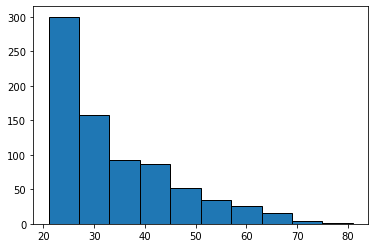

In [9]:
plt.hist(data.Age, edgecolor= 'black')
plt.show()

In [10]:
print("Maximum Age:" + str(data["Age"].max()))
print("Minimum Age:" + str(data["Age"].min()))

Maximum Age:81
Minimum Age:21


<AxesSubplot:xlabel='Age', ylabel='Density'>

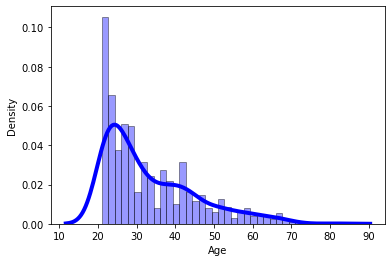

In [11]:
sns.distplot(data['Age'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

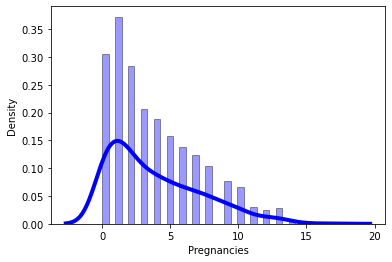

In [12]:
sns.distplot(data['Pregnancies'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

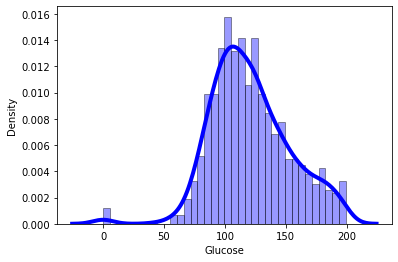

In [13]:
sns.distplot(data['Glucose'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

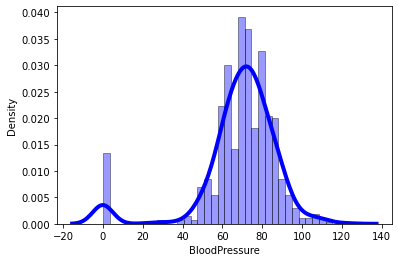

In [14]:
sns.distplot(data['BloodPressure'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

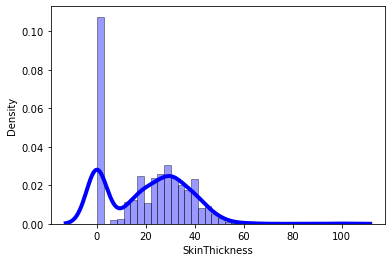

In [15]:
sns.distplot(data['SkinThickness'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

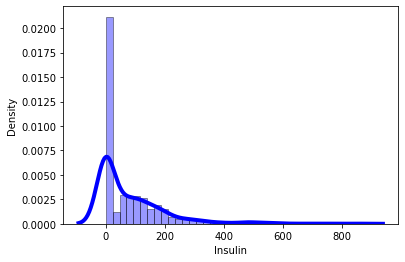

In [16]:
sns.distplot(data['Insulin'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='BMI', ylabel='Density'>

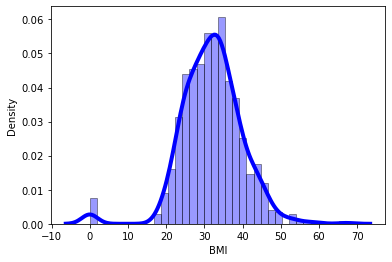

In [17]:
sns.distplot(data['BMI'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

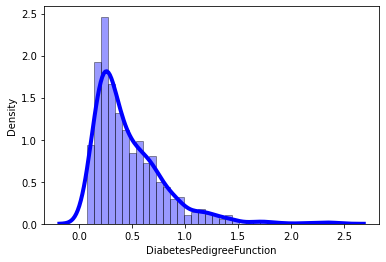

In [18]:
sns.distplot(data['DiabetesPedigreeFunction'], hist=True, kde=True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

GROUPBY w OUTCOMES

In [19]:
data.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [20]:
data.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [21]:
data.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [22]:
data.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [23]:
data.groupby("Outcome").agg({"Glucose":"max"})

,Glucose
Outcome,
0,197
1,199


In [24]:
data.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [25]:
data.groupby("Outcome").agg({"Insulin":"max"})

,Insulin
Outcome,
0,744
1,846


In [26]:
data.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


DATA VISUALIZATION

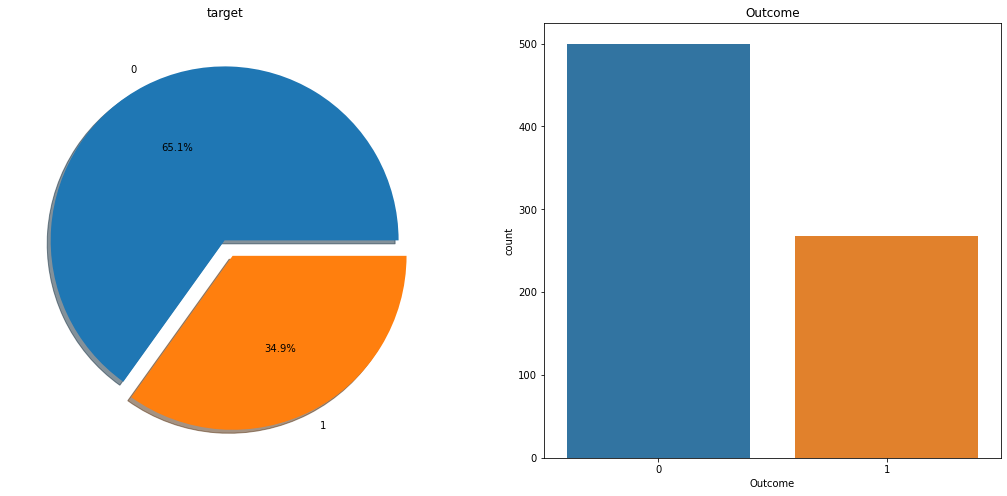

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [28]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


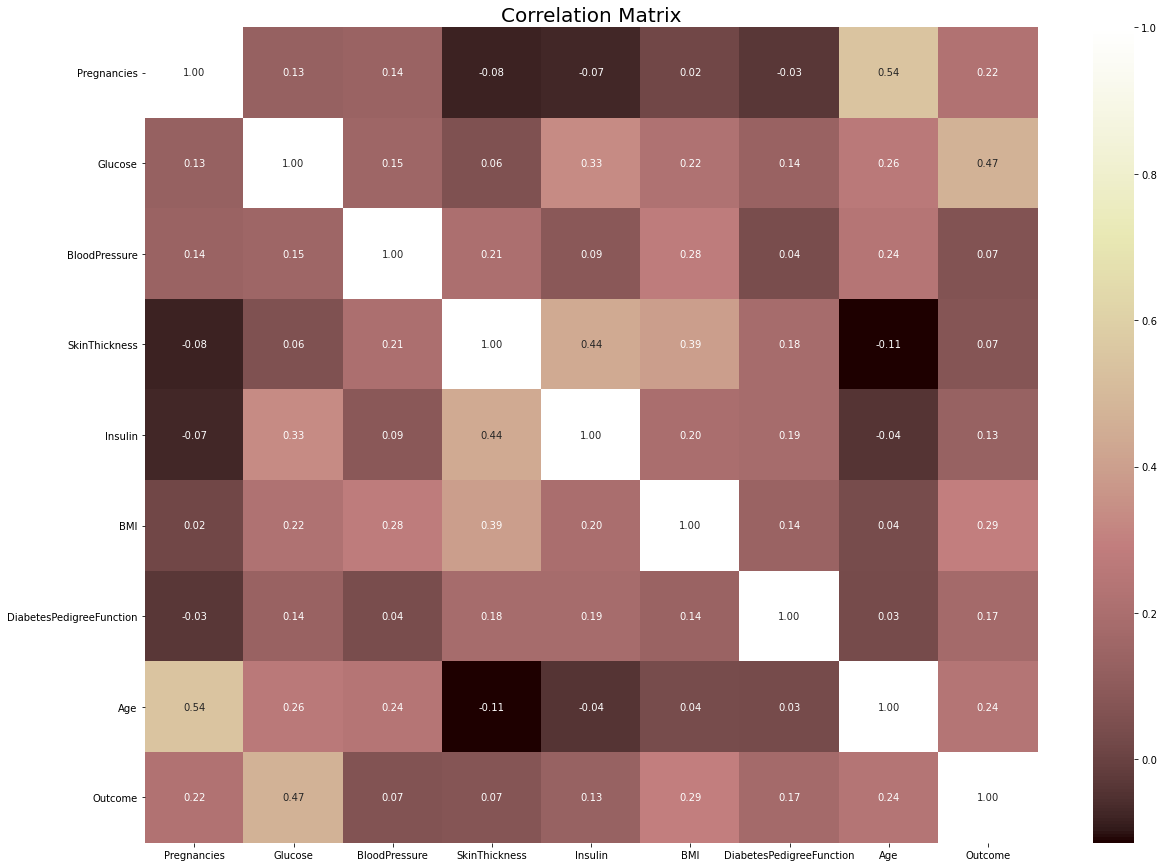

In [29]:
f, ax= plt.subplots(figsize = [20,15])
sns.heatmap(data.corr(), annot=True, fmt= ".2f", ax=ax, cmap='pink')
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()


DATA PREPROCESSING

OBSERVATION ANALYSIS

In [30]:
data[['Glucose', 'BloodPressure', 'Insulin', 'SkinThickness', 'BMI']] = data[['Glucose', 'BloodPressure', 'Insulin', 'SkinThickness', 'BMI']].replace(0, np.NaN)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
def median_target(var):
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [33]:
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1) & (data[i].isnull()), i] = median_target(i)[i][1]
    

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [35]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

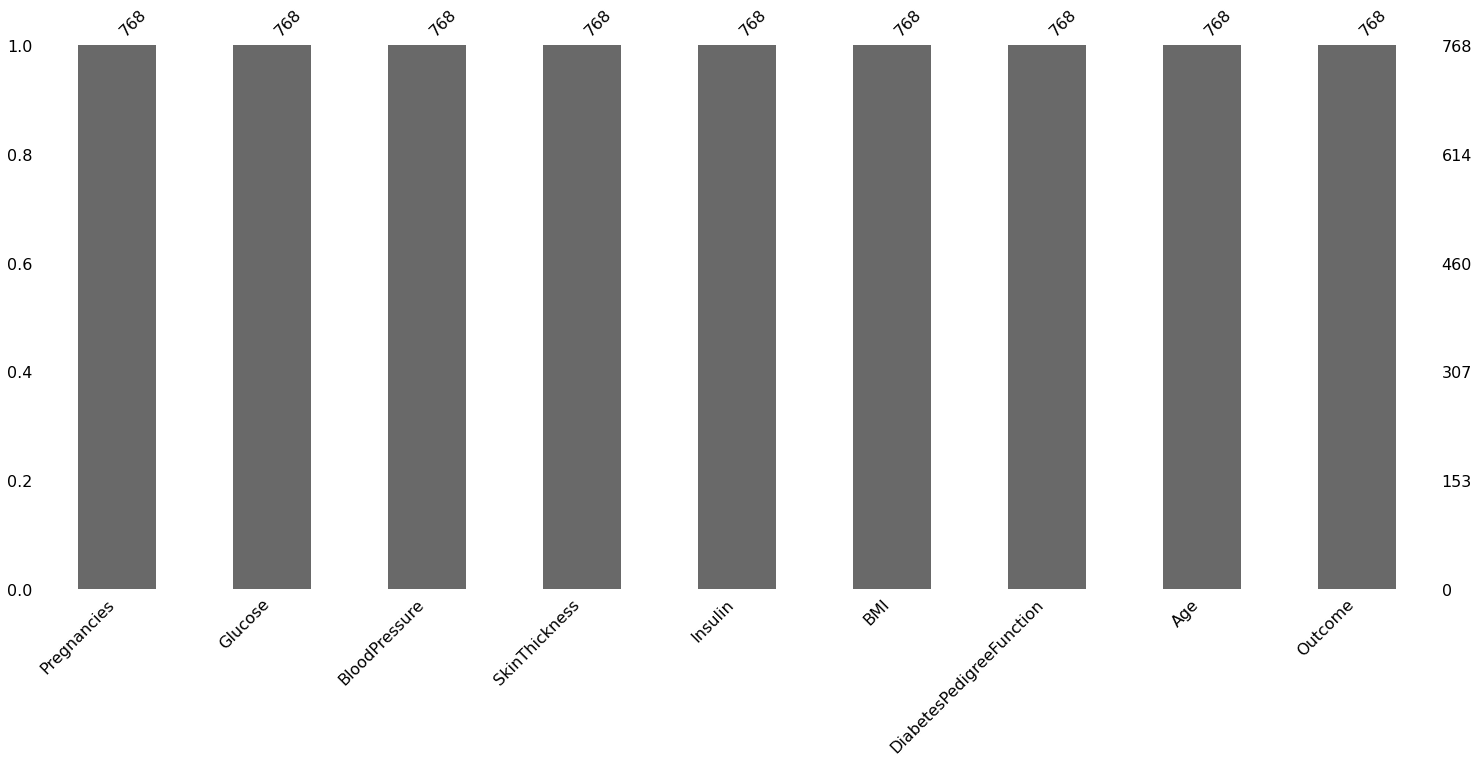

In [36]:
import missingno as msno
msno.bar(data);

OUTLIER OBSERVATION ANALYSIS

In [37]:
for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if data[data[feature]>upper].any(axis=None):
        print(feature, ": Yes")
    else:
        print(feature, ": No" )
    

Pregnancies : Yes
Glucose : No
BloodPressure : Yes
SkinThickness : Yes
Insulin : Yes
BMI : Yes
DiabetesPedigreeFunction : Yes
Age : Yes
Outcome : No


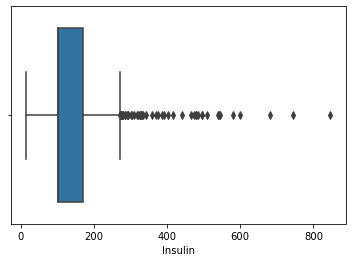

In [38]:
sns.boxplot(x = data['Insulin']);



In [39]:
Q1 = data.Insulin.quantile(0.25)
Q3 = data.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
data.loc[data["Insulin"]> upper, "Insulin"] = upper

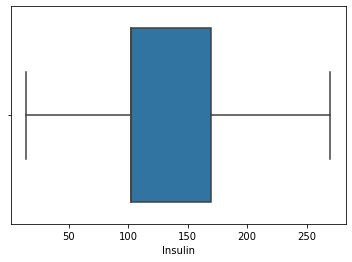

In [40]:
sns.boxplot(x = data["Insulin"]);

LOCAL OUTLIER FACTOR (LOF)

In [41]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [42]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:30]


array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [43]:
threshold = np.sort(data_scores)[7]
threshold

-1.740031580305444

In [44]:
outlier  = data_scores > threshold
data = data[outlier]

In [45]:
data.shape

(760, 9)

CREATING NEW VARIABLES FOR THE MODELS

In [46]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity1", "Obesity2", "Obesity3"], dtype = "category")
data['NewBMI'] = NewBMI
data.loc[data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
data.loc[(data["BMI"]>18.5) & (data["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
data.loc[(data["BMI"]>24.9) & (data["BMI"] <=29.9), "NewBMI"] = NewBMI[2]
data.loc[(data["BMI"]>29.9) & (data["BMI"] <=34.9), "NewBMI"] = NewBMI[3]
data.loc[(data["BMI"]>34.9) & (data["BMI"] <=39.9), "NewBMI"] = NewBMI[4]
data.loc[data["BMI"]>39.9, "NewBMI"] = NewBMI[5]


In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3


In [48]:
def set_insulin(row):
    if row['Insulin']>16 and row['Insulin']<166:
        return "Normal"
    else:
        return "Abnormal"
    

In [49]:
data = data.assign(New_Insulin_Score=data.apply(set_insulin, axis=1))

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,New_Insulin_Score
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,Abnormal


In [50]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = 'category')
data["NewGlucose"] = NewGlucose
data.loc[data["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
data.loc[(data["Glucose"]> 70) & (data["Glucose"]<=99), "NewGlucose"] = NewGlucose[1]
data.loc[(data["Glucose"]>99) & (data["Glucose"]<=126), "NewGlucose"] = NewGlucose[2]
data.loc[data["Glucose"]> 126, "NewGlucose"] = NewGlucose[3]

In [51]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,New_Insulin_Score,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,Abnormal,Secret


CONVERSION OF CATEGORICAL VALUES INTO NUMERICAL VALUES

In [52]:
data = pd.get_dummies(data, columns = ["NewBMI", "New_Insulin_Score", "NewGlucose"], drop_first=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity1,NewBMI_Obesity2,NewBMI_Obesity3,NewBMI_Overweight,NewBMI_Underweight,New_Insulin_Score_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [53]:
categorical_data = data[['NewBMI_Obesity1','NewBMI_Obesity2', 'NewBMI_Obesity3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'New_Insulin_Score_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [54]:
categorical_data.head()

,NewBMI_Obesity1,NewBMI_Obesity2,NewBMI_Obesity3,NewBMI_Overweight,NewBMI_Underweight,New_Insulin_Score_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [55]:
Y = data["Outcome"]
X = data.drop(['Outcome', 'NewBMI_Obesity1','NewBMI_Obesity2', 'NewBMI_Obesity3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'New_Insulin_Score_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [56]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


BASE MODEL

In [59]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []


LR: 0.797368 (0.037309)
KNN: 0.861842 (0.028977)
CART: 0.850000 (0.029539)
RF: 0.885526 (0.034837)
SVM: 0.653947 (0.006030)
XGB: 0.890789 (0.025000)
LightGBM: 0.877632 (0.030604)


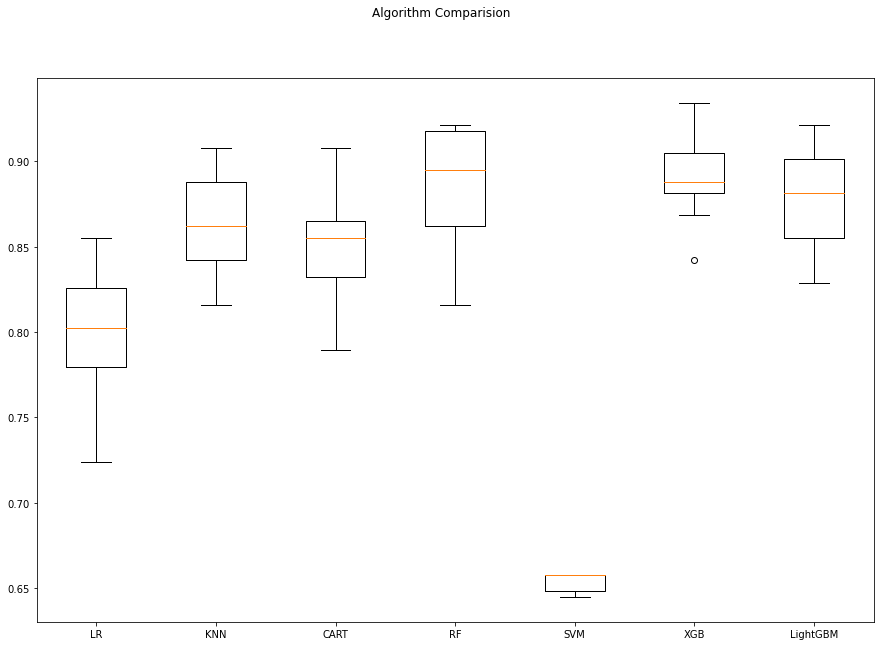

In [61]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

fig = plt.figure(figsize=(15,10))
fig.suptitle("Algorithm Comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

MODEL TUNING


RANDOM FOREST TUNING

In [62]:
rf_params = {"n_estimators":[100, 200, 500, 1000], "max_features": [3, 5, 7], "min_samples_split": [2,5,7,10], "max_depth": [3, 5, 8, None]}

In [63]:
rf_model = RandomForestClassifier(random_state= 12345)

In [65]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, Y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  5.4min finished


In [66]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

FINAL MODEL INSTALLATION

In [68]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [69]:
rf_tuned = rf_tuned.fit(X,Y)

In [70]:
cross_val_score(rf_tuned, X, Y, cv=10).mean()

0.8973684210526317

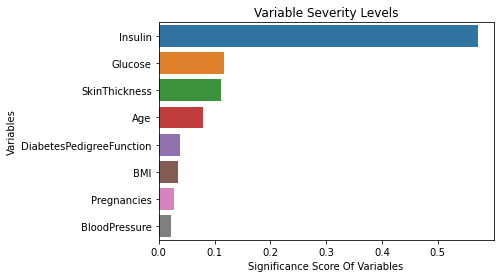

In [72]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

LIGHTGBM TUNING

In [73]:
lgbm = LGBMClassifier(random_state= 12345)


In [76]:
lgbm_params = {"learning_rate": [0.001, 0.003, 0.005, 0.1, 0.5], "n_estimators":[500, 1000, 1500], "depth": [3, 5, 8]}

In [78]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, Y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   40.6s finished


[LightGBM] [Warning] Unknown parameter: depth


In [80]:
gs_cv.best_params_

{'depth': 3, 'learning_rate': 0.003, 'n_estimators': 1000}

FINAL MODEL INSTALLATION

In [84]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,Y)


In [85]:
cross_val_score(lgbm, X, Y, cv =10).mean()

0.8776315789473685

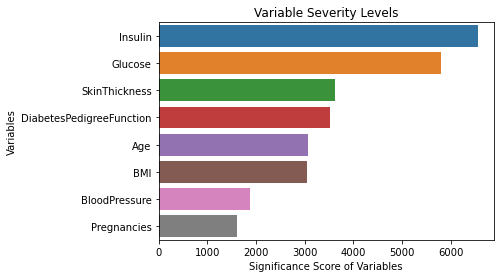

In [87]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                       index= X.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index )
plt.xlabel("Significance Score of Variables")
plt.ylabel("Variables")
plt.title("Variable Severity Levels")
plt.show()

XGBOOST TUNING

In [89]:
xgb_tuned = GradientBoostingClassifier(random_state=12345)

In [94]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [95]:
xgb_cv_model = GridSearchCV(xgb_tuned, xgb_params, cv=10, verbose = 2, n_jobs = -1).fit(X,Y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1029 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2001 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3297 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4917 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 5848 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6861 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 14.8min finished


In [96]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 0.14444444444444446,
 'n_estimators': 1000,
 'subsample': 1.0}

FINAL MODEL INSTALLATION

In [98]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,Y)

In [99]:
cross_val_score(xgb_tuned, X, Y, cv=10).mean()

0.8986842105263158

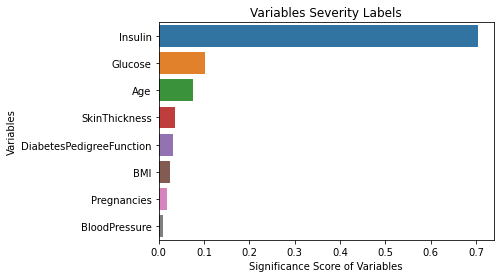

In [101]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                       index = X.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Significance Score of Variables")
plt.ylabel("Variables")
plt.title("Variables Severity Labels")
plt.show()

COMPARISON OF FINAL MODELS

In [103]:
models = []
models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth=8, max_features=7, min_samples_split=2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state=12345, learning_rate=0.1, max_depth=5, min_samples_split=0.1, n_estimators=100, subsample=1)))
models.append(('LightGBM', LGBMClassifier(random_state=12345, learning_rate=0.01, max_depth=3, n_estimators=1000)))
results = []
names = []

RF:0.892105 (0.028098)
XGB:0.898684 (0.028858)
LightGBM:0.889474 (0.035404)


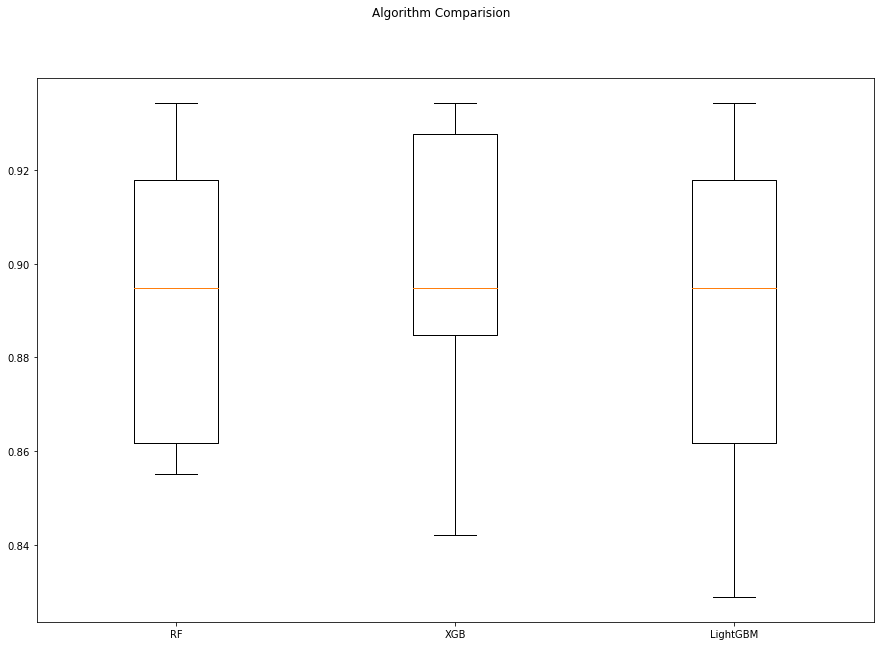

In [104]:
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 12345)
    cv_results = cross_val_score(model, X, Y, cv=10, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SURMEET MOHANTY